In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
# Creating synthetic data
series = np.sin( (0.1*np.arange(400))**2 )

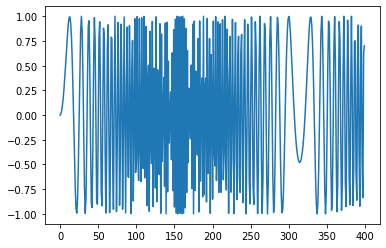

In [3]:
plt.plot(series)
plt.show()

In [4]:
# Window
T = 10
D = 1
# length of the data
n = len(series)

In [5]:
X = []
y = []

for t in range(0, n - T):
    x_t = series[t:t+T]
    y_t = series[t+T]
    X.append(x_t)
    y.append(y_t)


X = np.expand_dims(np.array(X), -1)
y = np.array(y)

In [6]:
print(f"X.shape = {X.shape} - y.shape = {y.shape}")

X.shape = (390, 10, 1) - y.shape = (390,)


In [7]:
half_split = len(y) // 2

X_train, X_test = X[:-half_split], X[-half_split:]
y_train, y_test = y[:-half_split], y[-half_split:]

## LSTM

In [8]:
i = tf.keras.layers.Input(shape=(T, D))
x = tf.keras.layers.LSTM(10) (i)
x = tf.keras.layers.Dense(1) (x)
model = tf.keras.models.Model(i, x)
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02)
)

fit_object = model.fit(
    X_train, y_train,
    epochs=80,
    validation_data=(X_test, y_test)
)

Epoch 1/80
7/7 [==============================] - 2s 83ms/step - loss: 0.5340 - val_loss: 0.4797
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5167 - val_loss: 0.4833
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5002 - val_loss: 0.5056
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.4786 - val_loss: 0.4885
Epoch 5/80
7/7 [==============================] - 0s 9ms/step - loss: 0.4575 - val_loss: 0.5282
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.4410 - val_loss: 0.5777
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.4349 - val_loss: 0.5722
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.3970 - val_loss: 0.6031
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.3619 - val_loss: 0.4835
Epoch 10/80
7/7 [==============================] - 0s 11ms/step - loss: 0.3293 - val_loss: 0.4578
Epoch 11/80
7/7 [==================

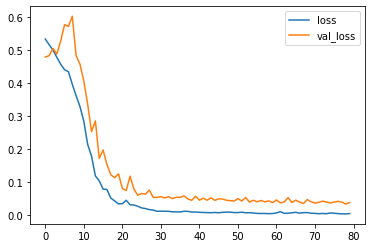

In [9]:
plt.plot(fit_object.history['loss'], label='loss')
plt.plot(fit_object.history['val_loss'], label='val_loss')
plt.legend()

In [10]:
# !TODO take a closer look at this code
# it works but I'm not sure how
validation_target = y_test
validation_predictions = []

i = -half_split

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0]
    i += 1

    validation_predictions.append(p)

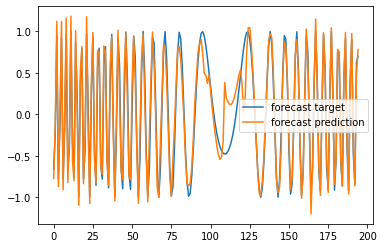

In [11]:
# differences between target and prediction
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()